In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
file_path = "/content/drive/MyDrive/INFLUD24-CE.csv"

In [167]:
df = pd.read_csv(file_path)

<ipython-input-167-47c250c455f0>:1: DtypeWarning: Columns (15,91,120) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [168]:
df.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,VG_REINF,REINF,FAB_ADIC,LOT_RE_BI,FAB_RE_BI,DOSE_ADIC,DOS_RE_BI,LOTE_ADIC,TABAG,CASO_SRAG
0,01/03/2024,9,28/02/2024,9,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,HOSPITAL GERAL DR WALDEMAR ALCANTARA,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,27/03/2024,13,21/03/2024,12,CE,20 CRES CRATO,1530.0,CRATO,230420,HOSPITAL E MATERNIDADE SAO FRANCISCO DE ASSIS,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/04/2024,15,10/04/2024,15,CE,13 CRES TIANGUA,1523.0,SAO BENEDITO,231230,HOSPITAL MUNICIPAL DR BUENO BANHOS,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,09/04/2024,15,06/04/2024,14,CE,13 CRES TIANGUA,1523.0,SAO BENEDITO,231230,HOSPITAL MUNICIPAL DR BUENO BANHOS,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,20/05/2024,21,20/05/2024,21,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,SOPAI HOSPITAL INFANTIL,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
# Dicionários para substituição
substituicoes = {
    "VACINA": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "VACINA_COV": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "HOSPITAL": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "UTI": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "EVOLUCAO": {1: "Cura", 2: "Óbito", 3: "Óbito por outras causas", 9: "Ignorado"},
    "CLASSI_FIN": {
        1: "SRAG por influenza",
        2: "SRAG por outro vírus respiratório",
        3: "SRAG por outro agente etiológico",
        4: "SRAG não especificado",
        5: "SRAG por covid-19",
    },
    "AMOSTRA": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "PCR_RESUL": {
        1: "Detectável",
        2: "Não Detectável",
        3: "Inconclusivo",
        4: "Não Realizado",
        5: "Aguardando Resultado",
        9: "Ignorado",
    },
    "PCR_ADENO": {1: "Marcado", 0: "Não Marcado"},
    "PCR_BOCA": {1: "Marcado", 0: "Não Marcado"},
    "PCR_METAP": {1: "Marcado", 0: "Não Marcado"},
    "PCR_RINO": {1: "Marcado", 0: "Não Marcado"},
    "PCR_PARA1": {1: "Marcado", 0: "Não Marcado"},
    "PCR_PARA2": {1: "Marcado", 0: "Não Marcado"},
    "PCR_PARA3": {1: "Marcado", 0: "Não Marcado"},
    "PCR_PARA4": {1: "Marcado", 0: "Não Marcado"},
    "PCR_SARS2": {1: "Marcado", 0: "Não Marcado"},
    "PCR_VSR": {1: "Marcado", 0: "Não Marcado"},
    "PCR_OUTRO": {1: "Marcado", 0: "Não Marcado"},
    "RES_AN": {
        1: "Positivo",
        2: "Negativo",
        3: "Inconclusivo",
        4: "Não Realizado",
        5: "Aguardando Resultado",
        9: "Ignorado",
    },
    "AN_ADENO": {1: "Marcado", 0: "Não Marcado"},
    "AN_PARA1": {1: "Marcado", 0: "Não Marcado"},
    "AN_PARA2": {1: "Marcado", 0: "Não Marcado"},
    "AN_PARA3": {1: "Marcado", 0: "Não Marcado"},
    "AN_SARS2": {1: "Marcado", 0: "Não Marcado"},
    "AN_VSR": {1: "Marcado", 0: "Não Marcado"},
    "AN_OUTRO": {1: "Marcado", 0: "Não Marcado"},
    "CRITERIO": {
        1: "Laboratorial",
        2: "Clínico Epidemiológico",
        3: "Clínico",
        4: "Clínico Imagem",
    },
    "TP_IDADE": {1: "Dia", 2: "Mês", 3: "Ano"},
    "CS_SEXO": {1: "Masculino", 2: "Feminino", 9: "Ignorado"},
}

# Aplicando as substituições no DataFrame
df.replace(substituicoes, inplace=True)

In [170]:
# Substituindo valores nulos em colunas numéricas por 0
df[df.select_dtypes(include=['number']).columns] = df.select_dtypes(include=['number']).fillna(0)
# Substituindo valores nulos em colunas de tipo objeto por "Indefinido"
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).fillna("Indefinido")

In [171]:
# Substituindo valores float por int
df[df.select_dtypes(include=['float']).columns] = df.select_dtypes(include=['float']).astype('int')

In [172]:
df.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,VG_REINF,REINF,FAB_ADIC,LOT_RE_BI,FAB_RE_BI,DOSE_ADIC,DOS_RE_BI,LOTE_ADIC,TABAG,CASO_SRAG
0,01/03/2024,9,28/02/2024,9,CE,1 CRES FORTALEZA,1519,FORTALEZA,230440,HOSPITAL GERAL DR WALDEMAR ALCANTARA,...,0,2,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,0,1
1,27/03/2024,13,21/03/2024,12,CE,20 CRES CRATO,1530,CRATO,230420,HOSPITAL E MATERNIDADE SAO FRANCISCO DE ASSIS,...,0,2,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,0,0
2,11/04/2024,15,10/04/2024,15,CE,13 CRES TIANGUA,1523,SAO BENEDITO,231230,HOSPITAL MUNICIPAL DR BUENO BANHOS,...,0,2,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,0,0
3,09/04/2024,15,06/04/2024,14,CE,13 CRES TIANGUA,1523,SAO BENEDITO,231230,HOSPITAL MUNICIPAL DR BUENO BANHOS,...,0,2,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,0,0
4,20/05/2024,21,20/05/2024,21,CE,1 CRES FORTALEZA,1519,FORTALEZA,230440,SOPAI HOSPITAL INFANTIL,...,0,2,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,0,0


In [173]:
# Filtrar as linhas onde SG_UF_NOT é igual a 'CE' e restaurar o índice
df_filtrado_regional = df.loc[df['ID_REGIONA'] == '12 CRES ACARAU'].reset_index(drop=True)

In [174]:
df_filtrado_regional['ID_MUNICIP'].unique()

array(['BELA CRUZ', 'CRUZ', 'ACARAU'], dtype=object)

In [175]:
df_filtrado_regional.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,VG_REINF,REINF,FAB_ADIC,LOT_RE_BI,FAB_RE_BI,DOSE_ADIC,DOS_RE_BI,LOTE_ADIC,TABAG,CASO_SRAG
0,26/09/2024,39,22/09/2024,39,CE,12 CRES ACARAU,1522,BELA CRUZ,230230,HOSPITAL MUNICIPAL DE BELA CRUZ,...,0,2,Indefinido,GJ5106,103 - COVID-19 PFIZER - COMIRNATY BIVALENTE,Indefinido,21/03/2023,Indefinido,0,0
1,31/05/2024,22,23/05/2024,21,CE,12 CRES ACARAU,1522,BELA CRUZ,230230,HOSPITAL MUNICIPAL DE BELA CRUZ,...,0,2,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,0,1
2,07/09/2024,36,04/09/2024,36,CE,12 CRES ACARAU,1522,BELA CRUZ,230230,HOSPITAL MUNICIPAL DE BELA CRUZ,...,0,2,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,0,1
3,25/05/2024,21,21/05/2024,21,CE,12 CRES ACARAU,1522,BELA CRUZ,230230,HOSPITAL MUNICIPAL DE BELA CRUZ,...,0,2,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,0,0
4,09/07/2024,28,08/07/2024,28,CE,12 CRES ACARAU,1522,CRUZ,230425,HOSP MUNIC DONA MARIA MUNIZ,...,0,2,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,Indefinido,0,1


In [176]:
# Criar um dicionário com as quantidades de habitantes
habitantes = {
    'BELA CRUZ': 32775,
    'CRUZ': 29761,
    'ACARAU': 64806
}

# Criar a nova coluna 'QTD_HAT' com base na coluna 'ID_MUNICIP'
df_filtrado_regional['QTD_HAT'] = df_filtrado_regional['ID_MUNICIP'].map(habitantes);

### Epidemiológicos

In [177]:
# Lista de colunas a manter
colunas_para_manter = [
    'ID_MUNICIP', 'CLASSI_FIN', 'CRITERIO', 'NU_IDADE_N', 'CS_SEXO',
    'VACINA', 'VACINA_COV', 'SEM_PRI', 'QTD_HAT'
]

# Filtrar o DataFrame
df_filtrado_Epidemiologicos = df_filtrado_regional[colunas_para_manter]

In [178]:
df_filtrado_Epidemiologicos

,ID_MUNICIP,CLASSI_FIN,CRITERIO,NU_IDADE_N,CS_SEXO,VACINA,VACINA_COV,SEM_PRI,QTD_HAT
0,BELA CRUZ,SRAG não especificado,Indefinido,76,F,Não,Sim,39,32775
1,BELA CRUZ,SRAG não especificado,Laboratorial,84,M,Indefinido,Sim,21,32775
2,BELA CRUZ,SRAG por outro vírus respiratório,Laboratorial,1,M,Sim,Sim,36,32775
3,BELA CRUZ,SRAG por outro vírus respiratório,Laboratorial,2,F,Indefinido,Sim,21,32775
4,CRUZ,SRAG não especificado,Laboratorial,60,M,Não,Sim,28,29761
...,...,...,...,...,...,...,...,...,...
325,BELA CRUZ,SRAG não especificado,Indefinido,81,M,Não,Sim,39,32775
326,CRUZ,SRAG não especificado,Laboratorial,60,F,Não,Sim,31,29761
327,CRUZ,SRAG não especificado,Laboratorial,58,F,Sim,Sim,26,29761
328,BELA CRUZ,SRAG não especificado,Indefinido,2,M,Sim,Sim,42,32775


In [179]:
# Criar um dicionário com as quantidades de habitantes
habitantes = {
    'BELA CRUZ': 32775,
    'CRUZ': 29761,
    'ACARAU': 64806
}

# Criar a nova coluna 'QTD_HAT' com base na coluna 'ID_MUNICIP'
df_filtrado_regional['QTD_HAT'] = df_filtrado_regional['ID_MUNICIP'].map(habitantes);

In [180]:
# Contar as ocorrências de cada valor em 'ID_MUNICIP'
municipios_count = df_filtrado_Epidemiologicos['ID_MUNICIP'].value_counts()

In [181]:
# Definindo as faixas etárias
bins = [0, 19, 59, 150]  # Limites das faixas etárias: Jovens (0-19), Adultos (20-59), Idosos (60+)
labels = ['Jovens', 'Adultos', 'Idosos']

# Criando a nova coluna com a faixa etária
df_filtrado_Epidemiologicos['FAIXA_ETARIA'] = pd.cut(df_filtrado_Epidemiologicos['NU_IDADE_N'], bins=bins, labels=labels)

<ipython-input-181-30aec8f44437>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_Epidemiologicos['FAIXA_ETARIA'] = pd.cut(df_filtrado_Epidemiologicos['NU_IDADE_N'], bins=bins, labels=labels)


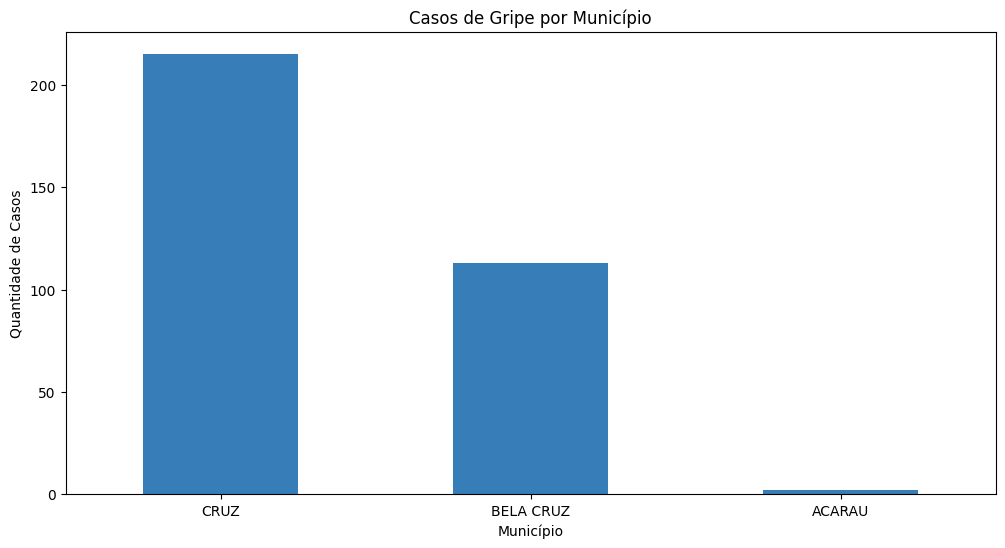

In [182]:
# Criar o gráfico
plt.figure(figsize=(12, 6))
municipios_count.plot(kind='bar', color='#377eb8')
plt.title('Casos de Gripe por Município')
plt.xlabel('Município')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=0)
plt.show()

In [183]:
# Dados fornecidos
municipios = ['CRUZ', 'BELA CRUZ', 'ACARAU']
incid_hab = [(215 / 29761), (113 / 32775), (2 / 64806)]

# Criando o DataFrame
df_indid_hab = pd.DataFrame({
    'MUNICIPIO': municipios,
    'INCIDENCIA POR HABITANTE': incid_hab
})

df_indid_hab

,MUNICIPIO,INCIDENCIA POR HABITANTE
0,CRUZ,0.007224
1,BELA CRUZ,0.003448
2,ACARAU,0.000031


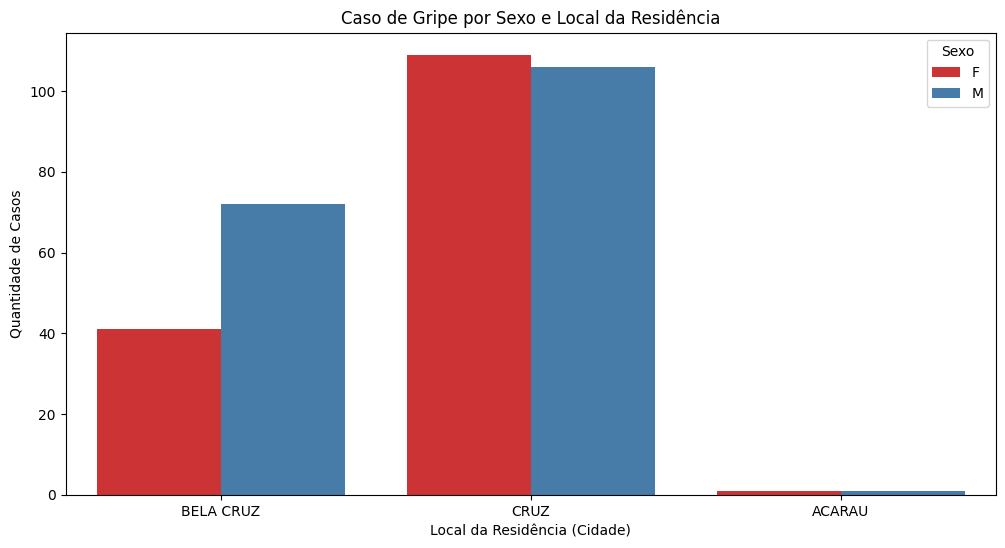

In [184]:
# Gráfico de Distribuição por Sexo por Local de Residência
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado_Epidemiologicos, x='ID_MUNICIP', hue='CS_SEXO', palette='Set1')
plt.title('Caso de Gripe por Sexo e Local da Residência')
plt.xlabel('Local da Residência (Cidade)')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
plt.show()

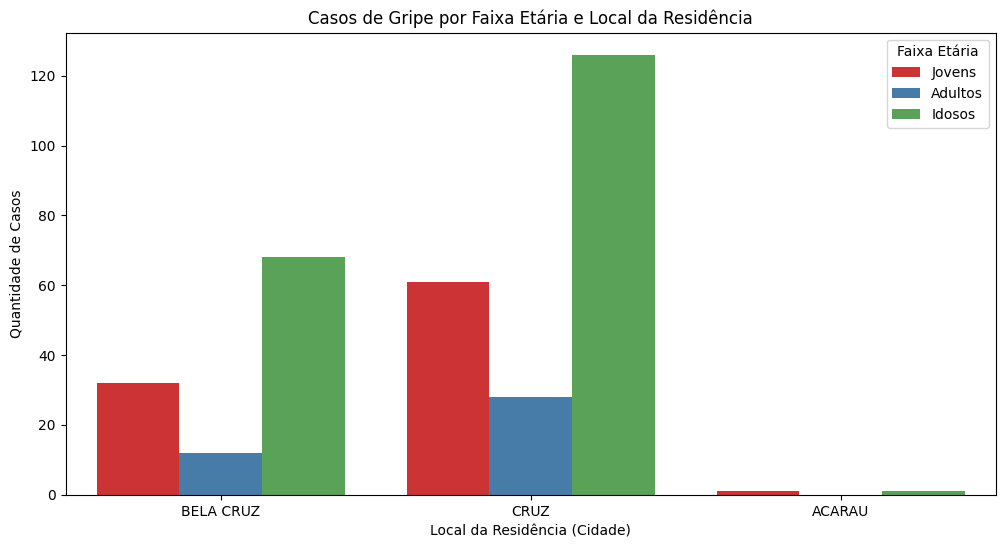

In [185]:
# Gráfico de Distribuição por Faixa Etária
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado_Epidemiologicos, x='ID_MUNICIP', hue='FAIXA_ETARIA', palette='Set1')
plt.title('Casos de Gripe por Faixa Etária e Local da Residência')
plt.xlabel('Local da Residência (Cidade)')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=0)
plt.legend(title='Faixa Etária')
plt.show()

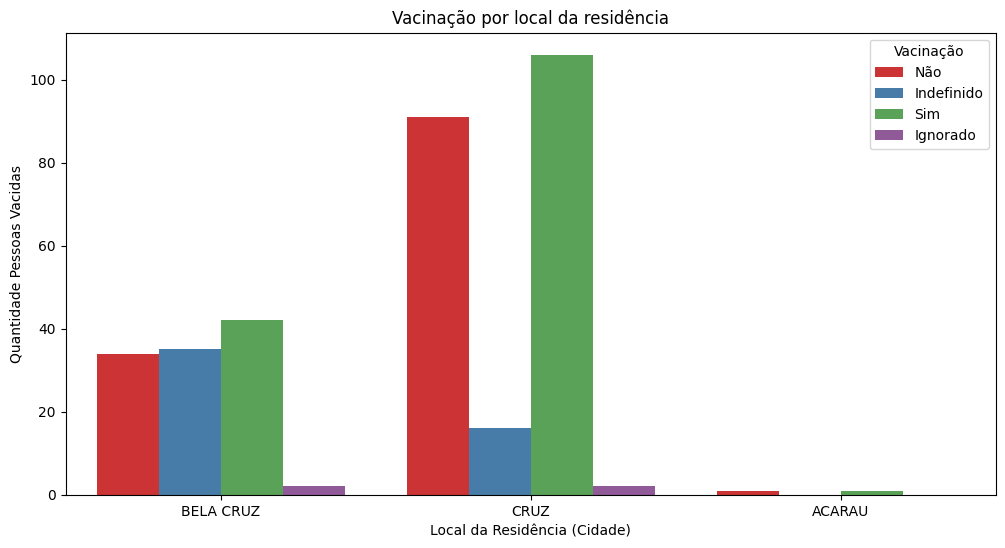

In [186]:
# Gráfico de Distribuição por Sexo por Local de Residência
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado_Epidemiologicos, x='ID_MUNICIP', hue='VACINA', palette='Set1')
plt.title('Vacinação por local da residência')
plt.xlabel('Local da Residência (Cidade)')
plt.ylabel('Quantidade Pessoas Vacidas')
plt.xticks(rotation=0)
plt.legend(title='Vacinação')
plt.show()

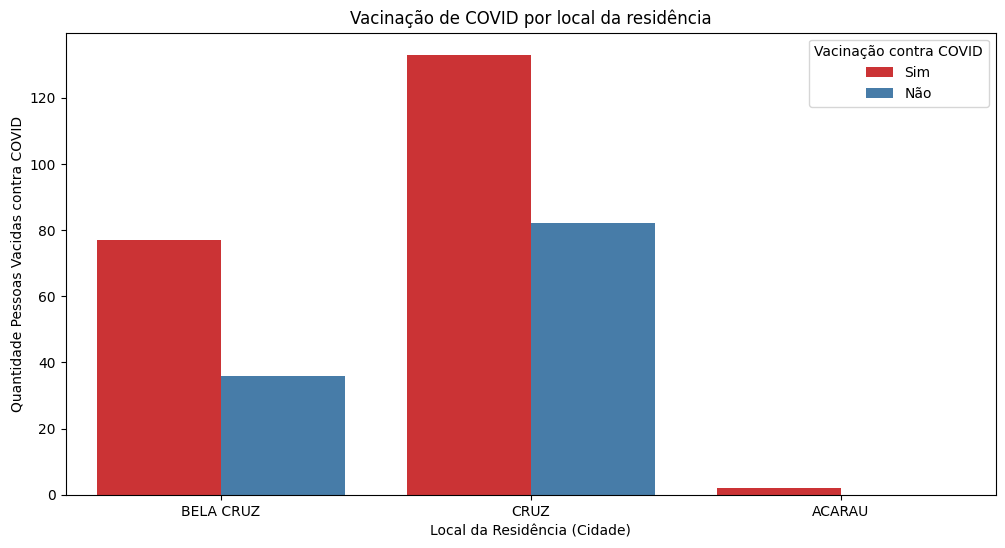

In [187]:
# Gráfico de Distribuição por Sexo por Local de Residência
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado_Epidemiologicos, x='ID_MUNICIP', hue='VACINA_COV', palette='Set1')
plt.title('Vacinação de COVID por local da residência')
plt.xlabel('Local da Residência (Cidade)')
plt.ylabel('Quantidade Pessoas Vacidas contra COVID')
plt.xticks(rotation=0)
plt.legend(title='Vacinação contra COVID')
plt.show()

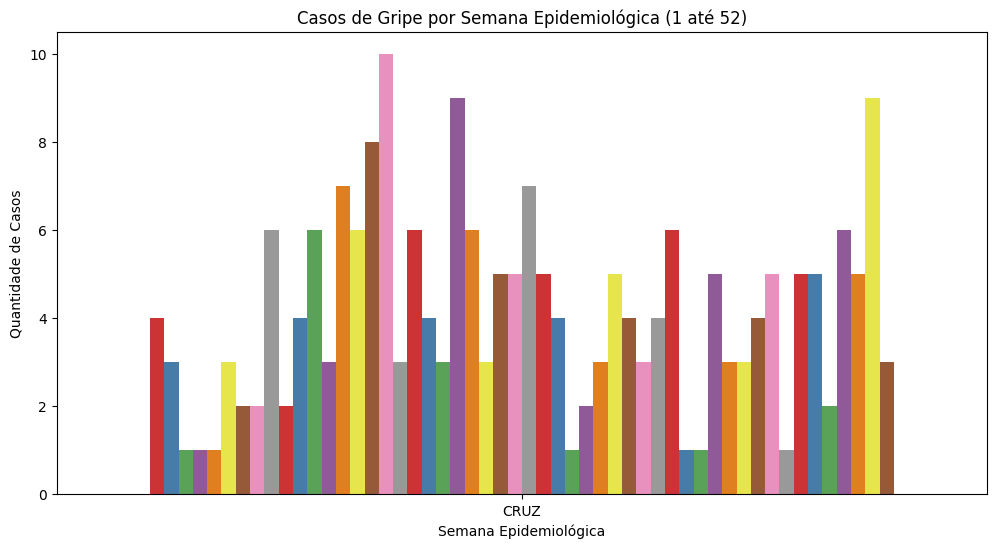

In [188]:
# Filtrando os dados para a cidade 'CRUZ'
df_cruz = df_filtrado_Epidemiologicos[df_filtrado_Epidemiologicos['ID_MUNICIP'] == 'CRUZ']

# Gráfico de Distribuição por Sexo por Local de Residência para a cidade 'CRUZ'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cruz, x='ID_MUNICIP', hue='SEM_PRI', palette='Set1', legend=False)
plt.title('Casos de Gripe por Semana Epidemiológica (1 até 52)')
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=0)
plt.show()

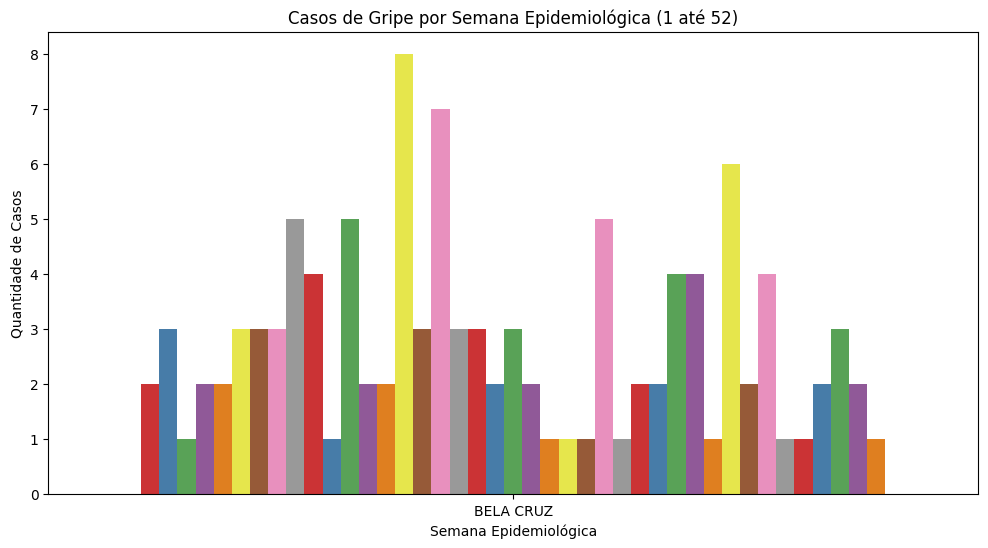

In [189]:
# Filtrando os dados para a cidade 'CRUZ'
df_belacruz = df_filtrado_Epidemiologicos[df_filtrado_Epidemiologicos['ID_MUNICIP'] == 'BELA CRUZ']

# Gráfico de Distribuição por Sexo por Local de Residência para a cidade 'CRUZ'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_belacruz, x='ID_MUNICIP', hue='SEM_PRI', palette='Set1', legend=False)
plt.title('Casos de Gripe por Semana Epidemiológica (1 até 52)')
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=0)
plt.show()

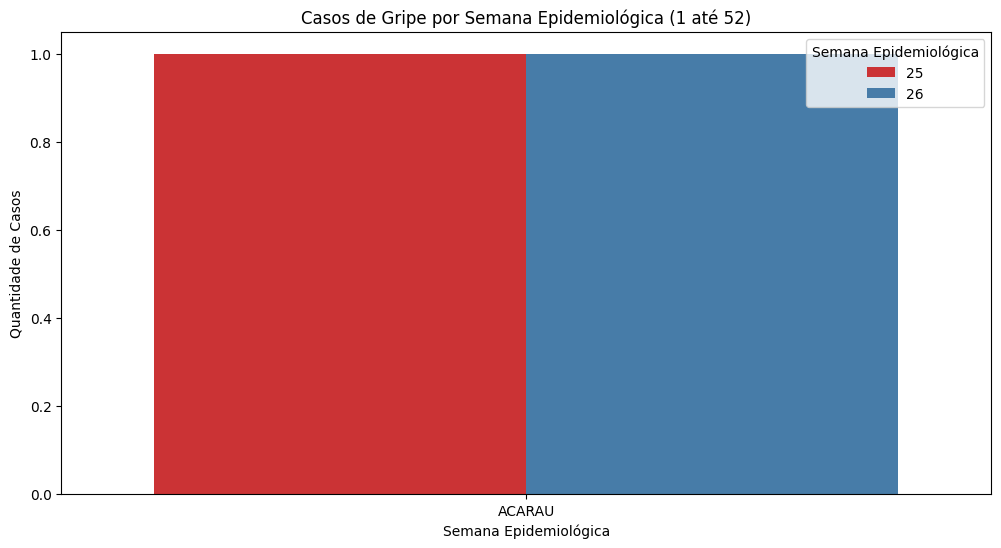

In [190]:
# Filtrando os dados para a cidade 'CRUZ'
df_acarau = df_filtrado_Epidemiologicos[df_filtrado_Epidemiologicos['ID_MUNICIP'] == 'ACARAU']

# Gráfico de Distribuição por Sexo por Local de Residência para a cidade 'CRUZ'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_acarau, x='ID_MUNICIP', hue='SEM_PRI', palette='Set1')
plt.title('Casos de Gripe por Semana Epidemiológica (1 até 52)')
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=0)
plt.legend(title='Semana Epidemiológica')
plt.show()

In [191]:
#df_filtrado_Epidemiologicos.to_csv('regional_epidemiologicos.csv', index=False)

### Vigilância Laboratorial

In [192]:
# Lista de colunas a manter
colunas_para_manter = [
    'ID_MUNICIP', 'AMOSTRA', 'PCR_RESUL', 'RES_AN',
    'DT_COLETA', 'DT_PCR', 'DT_RES_AN'
    ]

# Filtrar o DataFrame
df_filtrado_vig_lab = df_filtrado_regional[colunas_para_manter]

In [193]:
df_filtrado_vig_lab

,ID_MUNICIP,AMOSTRA,PCR_RESUL,RES_AN,DT_COLETA,DT_PCR,DT_RES_AN
0,BELA CRUZ,Sim,Não Detectável,Aguardando Resultado,26/09/2024,30/09/2024,Indefinido
1,BELA CRUZ,Sim,Não Detectável,Aguardando Resultado,31/05/2024,05/06/2024,Indefinido
2,BELA CRUZ,Sim,Detectável,Aguardando Resultado,07/09/2024,11/09/2024,Indefinido
3,BELA CRUZ,Sim,Detectável,Aguardando Resultado,25/05/2024,28/05/2024,Indefinido
4,CRUZ,Sim,Não Detectável,Não Realizado,09/07/2024,10/07/2024,Indefinido
...,...,...,...,...,...,...,...
325,BELA CRUZ,Sim,Não Detectável,Aguardando Resultado,28/09/2024,02/10/2024,Indefinido
326,CRUZ,Sim,Não Detectável,Não Realizado,01/08/2024,02/08/2024,Indefinido
327,CRUZ,Sim,Não Detectável,Não Realizado,30/06/2024,01/07/2024,Indefinido
328,BELA CRUZ,Sim,Não Detectável,Aguardando Resultado,22/10/2024,25/10/2024,Indefinido


In [194]:
# Converte as colunas para o tipo datetime
df_filtrado_vig_lab['DT_COLETA'] = pd.to_datetime(df_filtrado_vig_lab['DT_COLETA'], errors='coerce', format='%d/%m/%Y')
df_filtrado_vig_lab['DT_PCR'] = pd.to_datetime(df_filtrado_vig_lab['DT_PCR'], errors='coerce', format='%d/%m/%Y')

# Subtração das datas
df_filtrado_vig_lab['DIFERENCA'] = df_filtrado_vig_lab['DT_PCR'] - df_filtrado_vig_lab['DT_COLETA']

# Converte a diferença para o formato inteiro de dias
df_filtrado_vig_lab['DIFERENCA'] = df_filtrado_vig_lab['DIFERENCA'].dt.days

<ipython-input-194-da81274aefeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_vig_lab['DT_COLETA'] = pd.to_datetime(df_filtrado_vig_lab['DT_COLETA'], errors='coerce', format='%d/%m/%Y')
<ipython-input-194-da81274aefeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_vig_lab['DT_PCR'] = pd.to_datetime(df_filtrado_vig_lab['DT_PCR'], errors='coerce', format='%d/%m/%Y')
<ipython-input-194-da81274aefeb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

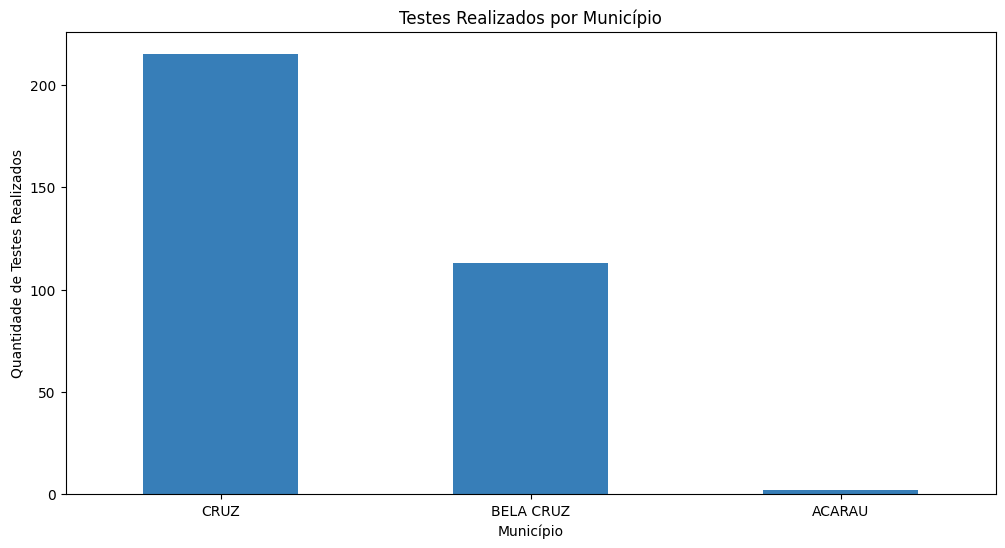

In [195]:
# Criar o gráfico
plt.figure(figsize=(12, 6))
municipios_count.plot(kind='bar', color='#377eb8')
plt.title('Testes Realizados por Município')
plt.xlabel('Município')
plt.ylabel('Quantidade de Testes Realizados')
plt.xticks(rotation=0)
plt.show()

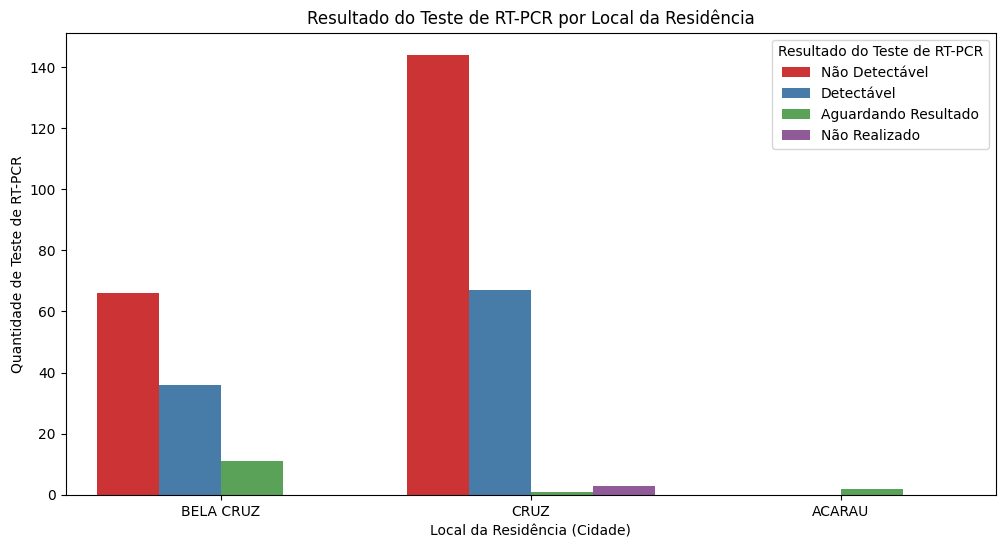

In [196]:
# Gráfico de Distribuição por Sexo por Local de Residência
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado_vig_lab, x='ID_MUNICIP', hue='PCR_RESUL', palette='Set1')
plt.title('Resultado do Teste de RT-PCR por Local da Residência')
plt.xlabel('Local da Residência (Cidade)')
plt.ylabel('Quantidade de Teste de RT-PCR')
plt.xticks(rotation=0)
plt.legend(title='Resultado do Teste de RT-PCR')
plt.show()

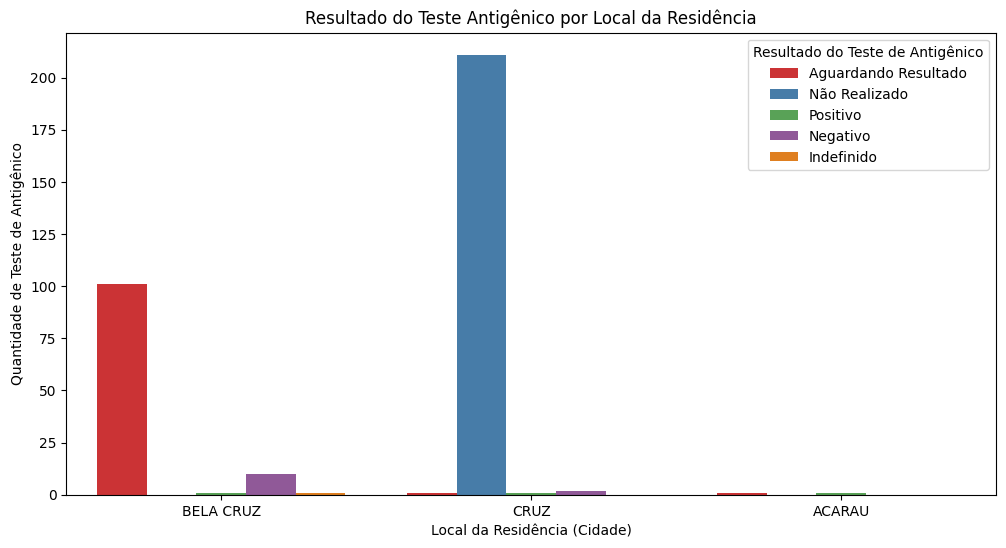

In [197]:
# Gráfico de Distribuição por Sexo por Local de Residência
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado_vig_lab, x='ID_MUNICIP', hue='RES_AN', palette='Set1')
plt.title('Resultado do Teste Antigênico por Local da Residência')
plt.xlabel('Local da Residência (Cidade)')
plt.ylabel('Quantidade de Teste de Antigênico')
plt.xticks(rotation=0)
plt.legend(title='Resultado do Teste de Antigênico')
plt.show()

In [198]:
df_filtrado_vig_lab.groupby('ID_MUNICIP')['DIFERENCA'].mean().round()

,DIFERENCA
ID_MUNICIP,
ACARAU,NaN
BELA CRUZ,4.0
CRUZ,2.0


### Mortalidade

In [199]:
# Lista de colunas a manter
colunas_para_manter = [
    'ID_MUNICIP', 'CLASSI_FIN', 'EVOLUCAO'
]

# Filtrar o DataFrame
df_filtrado_mortalidade = df_filtrado_regional[colunas_para_manter]

In [200]:
df_filtrado_mortalidade

,ID_MUNICIP,CLASSI_FIN,EVOLUCAO
0,BELA CRUZ,SRAG não especificado,Indefinido
1,BELA CRUZ,SRAG não especificado,Cura
2,BELA CRUZ,SRAG por outro vírus respiratório,Cura
3,BELA CRUZ,SRAG por outro vírus respiratório,Cura
4,CRUZ,SRAG não especificado,Indefinido
...,...,...,...
325,BELA CRUZ,SRAG não especificado,Indefinido
326,CRUZ,SRAG não especificado,Indefinido
327,CRUZ,SRAG não especificado,Indefinido
328,BELA CRUZ,SRAG não especificado,Cura


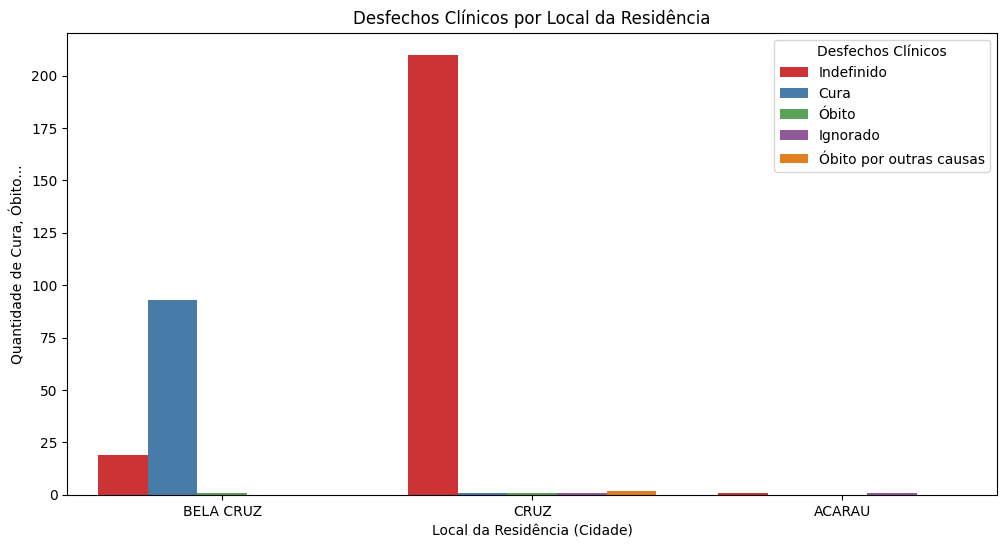

In [201]:
# Gráfico de Distribuição por Sexo por Local de Residência
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado_mortalidade, x='ID_MUNICIP', hue='EVOLUCAO', palette='Set1')
plt.title('Desfechos Clínicos por Local da Residência')
plt.xlabel('Local da Residência (Cidade)')
plt.ylabel('Quantidade de Cura, Óbito...')
plt.xticks(rotation=0)
plt.legend(title='Desfechos Clínicos')
plt.show()

In [202]:
df_filtrado_mortalidade.loc[(df_filtrado_mortalidade['EVOLUCAO'] == 'Óbito') | (df_filtrado_mortalidade['EVOLUCAO'] == 'Óbito por outras causas')]

,ID_MUNICIP,CLASSI_FIN,EVOLUCAO
9,BELA CRUZ,SRAG não especificado,Óbito
64,CRUZ,SRAG por covid-19,Óbito
98,CRUZ,SRAG não especificado,Óbito por outras causas
169,CRUZ,SRAG não especificado,Óbito por outras causas


### Clínicos e Assistenciais

In [203]:
# Lista de colunas a manter
colunas_para_manter = [
    'ID_MUNICIP', 'HOSPITAL', 'UTI', 'EVOLUCAO'
]

# Filtrar o DataFrame
df_filtrado_clinico_assistencia = df_filtrado_regional[colunas_para_manter]

In [204]:
df_filtrado_clinico_assistencia

,ID_MUNICIP,HOSPITAL,UTI,EVOLUCAO
0,BELA CRUZ,Sim,Não,Indefinido
1,BELA CRUZ,Sim,Não,Cura
2,BELA CRUZ,Sim,Não,Cura
3,BELA CRUZ,Indefinido,Indefinido,Cura
4,CRUZ,Sim,Não,Indefinido
...,...,...,...,...
325,BELA CRUZ,Sim,Não,Indefinido
326,CRUZ,Sim,Não,Indefinido
327,CRUZ,Sim,Não,Indefinido
328,BELA CRUZ,Sim,Não,Cura


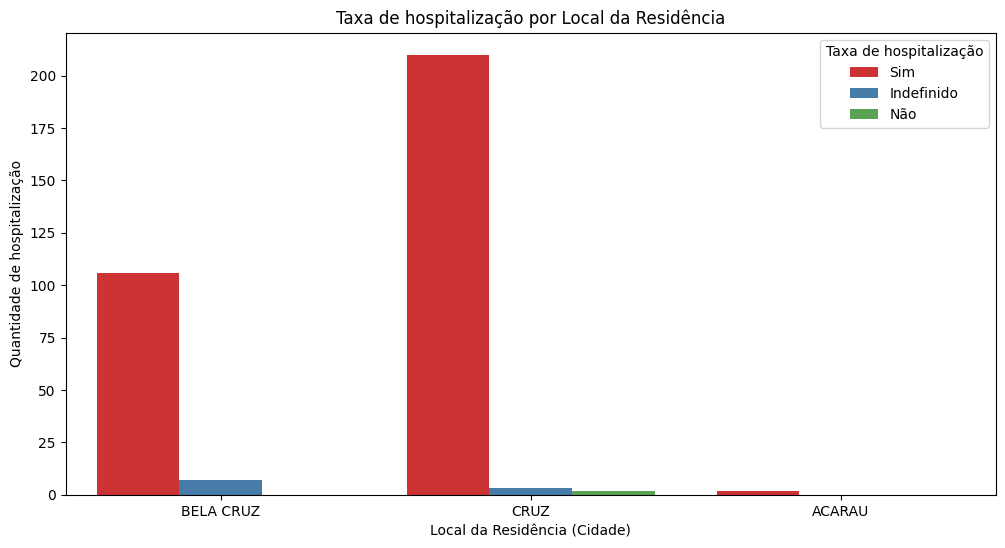

In [205]:
# Gráfico de Distribuição por Sexo por Local de Residência
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado_clinico_assistencia, x='ID_MUNICIP', hue='HOSPITAL', palette='Set1')
plt.title('Taxa de hospitalização por Local da Residência')
plt.xlabel('Local da Residência (Cidade)')
plt.ylabel('Quantidade de hospitalização')
plt.xticks(rotation=0)
plt.legend(title='Taxa de hospitalização')
plt.show()

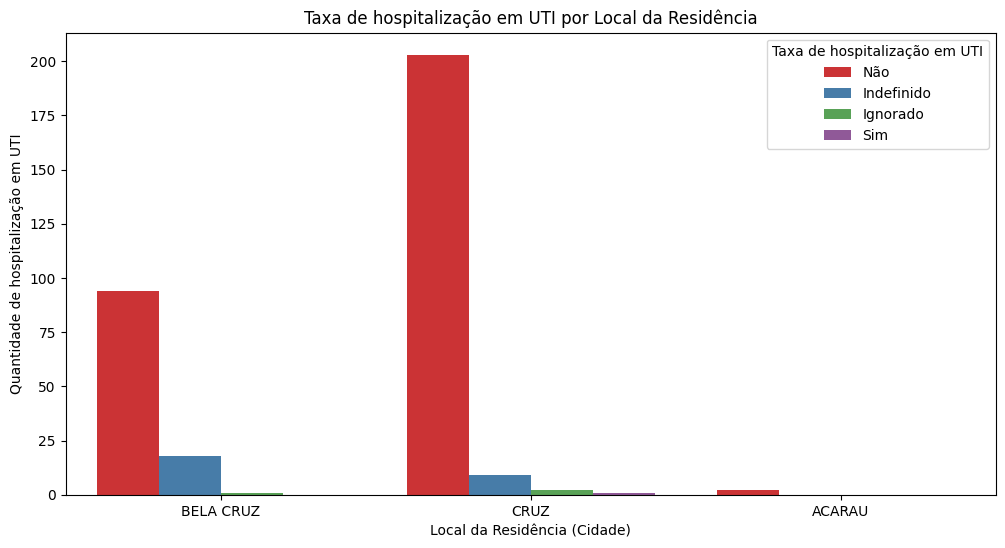

In [206]:
# Gráfico de Distribuição por Sexo por Local de Residência
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado_clinico_assistencia, x='ID_MUNICIP', hue='UTI', palette='Set1')
plt.title('Taxa de hospitalização em UTI por Local da Residência')
plt.xlabel('Local da Residência (Cidade)')
plt.ylabel('Quantidade de hospitalização em UTI')
plt.xticks(rotation=0)
plt.legend(title='Taxa de hospitalização em UTI')
plt.show()

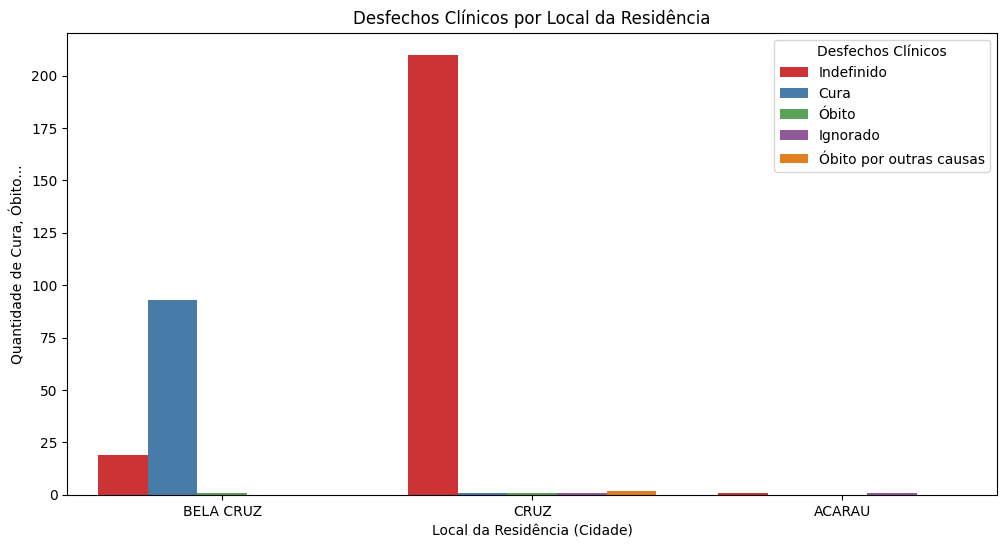

In [207]:
# Gráfico de Distribuição por Sexo por Local de Residência
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado_clinico_assistencia, x='ID_MUNICIP', hue='EVOLUCAO', palette='Set1')
plt.title('Desfechos Clínicos por Local da Residência')
plt.xlabel('Local da Residência (Cidade)')
plt.ylabel('Quantidade de Cura, Óbito...')
plt.xticks(rotation=0)
plt.legend(title='Desfechos Clínicos')
plt.show()

### Vacinação e Resposta

In [208]:
# Lista de colunas a manter
colunas_para_manter = [
    'ID_MUNICIP', 'VACINA', 'VACINA_COV', 'DT_SIN_PRI', 'DT_NOTIFIC'
]

# Filtrar o DataFrame
df_filtrado_vacinacao_resposta = df_filtrado_regional[colunas_para_manter]

In [209]:
df_filtrado_vacinacao_resposta

,ID_MUNICIP,VACINA,VACINA_COV,DT_SIN_PRI,DT_NOTIFIC
0,BELA CRUZ,Não,Sim,22/09/2024,26/09/2024
1,BELA CRUZ,Indefinido,Sim,23/05/2024,31/05/2024
2,BELA CRUZ,Sim,Sim,04/09/2024,07/09/2024
3,BELA CRUZ,Indefinido,Sim,21/05/2024,25/05/2024
4,CRUZ,Não,Sim,08/07/2024,09/07/2024
...,...,...,...,...,...
325,BELA CRUZ,Não,Sim,25/09/2024,28/09/2024
326,CRUZ,Não,Sim,28/07/2024,01/08/2024
327,CRUZ,Sim,Sim,28/06/2024,30/06/2024
328,BELA CRUZ,Sim,Sim,18/10/2024,22/10/2024


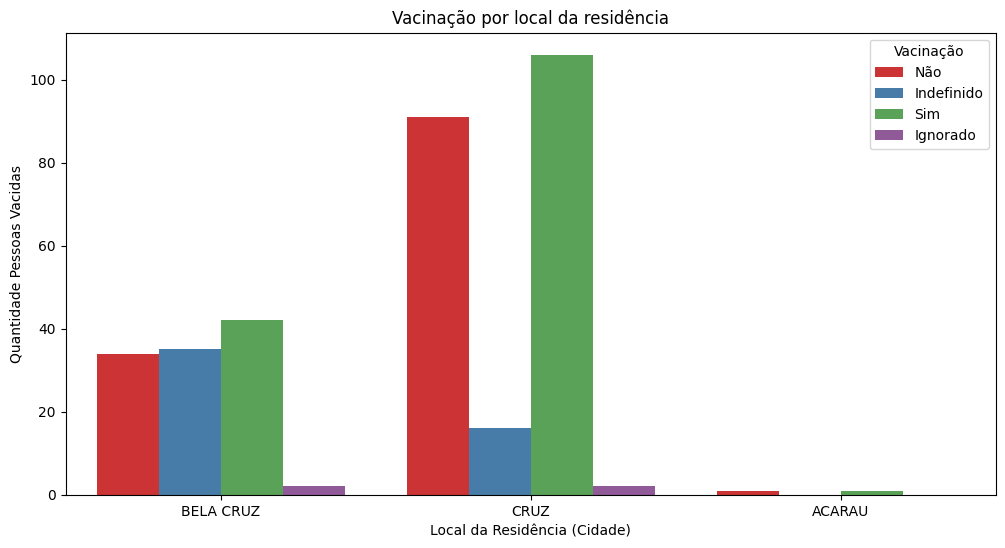

In [210]:
# Gráfico de Distribuição por Sexo por Local de Residência
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado_vacinacao_resposta, x='ID_MUNICIP', hue='VACINA', palette='Set1')
plt.title('Vacinação por local da residência')
plt.xlabel('Local da Residência (Cidade)')
plt.ylabel('Quantidade Pessoas Vacidas')
plt.xticks(rotation=0)
plt.legend(title='Vacinação')
plt.show()

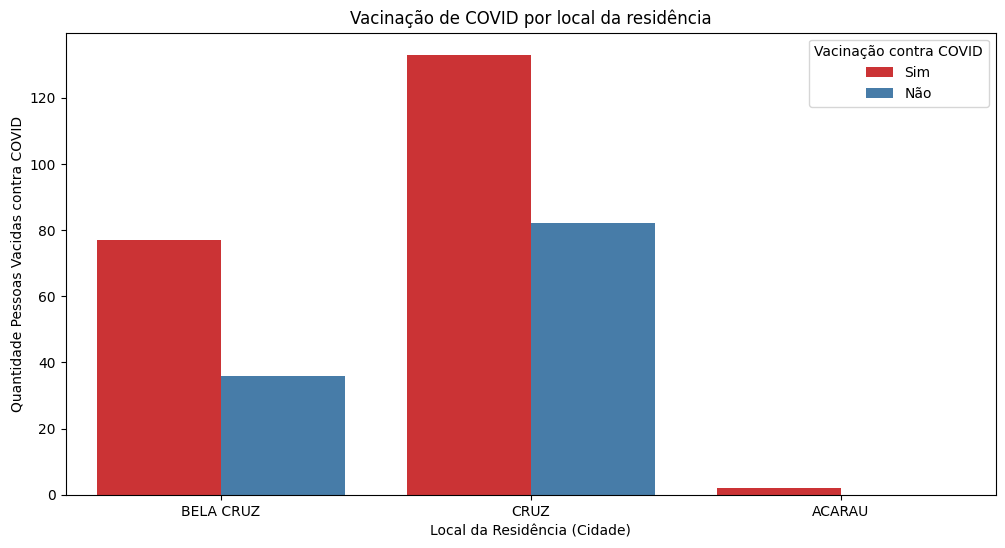

In [211]:
# Gráfico de Distribuição por Sexo por Local de Residência
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado_vacinacao_resposta, x='ID_MUNICIP', hue='VACINA_COV', palette='Set1')
plt.title('Vacinação de COVID por local da residência')
plt.xlabel('Local da Residência (Cidade)')
plt.ylabel('Quantidade Pessoas Vacidas contra COVID')
plt.xticks(rotation=0)
plt.legend(title='Vacinação contra COVID')
plt.show()

In [212]:
# Converte as colunas para o tipo datetime
df_filtrado_vacinacao_resposta['DT_SIN_PRI'] = pd.to_datetime(df_filtrado_vacinacao_resposta['DT_SIN_PRI'], errors='coerce', format='%d/%m/%Y')
df_filtrado_vacinacao_resposta['DT_NOTIFIC'] = pd.to_datetime(df_filtrado_vacinacao_resposta['DT_NOTIFIC'], errors='coerce', format='%d/%m/%Y')

# Subtração das datas
df_filtrado_vacinacao_resposta['DIFERENCA'] = df_filtrado_vacinacao_resposta['DT_NOTIFIC'] - df_filtrado_vacinacao_resposta['DT_SIN_PRI']

# Converte a diferença para o formato inteiro de dias
df_filtrado_vacinacao_resposta['DIFERENCA'] = df_filtrado_vacinacao_resposta['DIFERENCA'].dt.days

<ipython-input-212-ca0735ee131d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_vacinacao_resposta['DT_SIN_PRI'] = pd.to_datetime(df_filtrado_vacinacao_resposta['DT_SIN_PRI'], errors='coerce', format='%d/%m/%Y')
<ipython-input-212-ca0735ee131d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_vacinacao_resposta['DT_NOTIFIC'] = pd.to_datetime(df_filtrado_vacinacao_resposta['DT_NOTIFIC'], errors='coerce', format='%d/%m/%Y')
<ipython-input-212-ca0735ee131d>:6: SettingWithCopyWarning: 

In [213]:
df_filtrado_vacinacao_resposta.groupby('ID_MUNICIP')['DIFERENCA'].mean().round()

,DIFERENCA
ID_MUNICIP,
ACARAU,2.0
BELA CRUZ,5.0
CRUZ,4.0
